In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
df=pd.read_csv('headbrain.csv')
print(df.head(5))

   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


In [2]:
X=df['Head Size(cm^3)'].values
Y=df['Brain Weight(grams)'].values

In [3]:
mean_x=np.mean(X)
mean_y=np.mean(Y)

n=len(X)
numer=0
denom=0
for i in range(n):
    numer+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2

b1=numer/denom
b0=mean_y-(b1*mean_x)

print("The value of b0 is ",b0)
print("The value of b1 is ",b1)

The value of b0 is  325.57342104944223
The value of b1 is  0.26342933948939945


In [4]:
#Coefficient of determination R2 score using formula
ss_t=0
ss_r=0
for i in range(n):
    y_pred=b0+b1*X[i]
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(Y[i]-y_pred)**2

r2=1-(ss_r/ss_t)
print("R2 score is ",r2)

R2 score is  0.6393117199570003


In [5]:
#Coefficient of determination R2 score using Function 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X=X.reshape((n,1))
reg=LinearRegression()
reg=reg.fit(X,Y)
Y_pred=reg.predict(X)

r2_score=reg.score(X,Y)

print("R2 score is ",r2_score)

R2 score is  0.639311719957


In [6]:
def plot_regression_line(x, y, b):
    plt.scatter(x, y, color = "m",marker = "o", s = 30)
    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color = "g")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


[325.57342104944223, 0.26342933948939945]


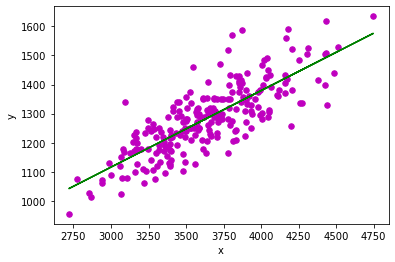

In [7]:
b=[]
b.append(b0)
b.append(b1)
print(b)
plot_regression_line(X,Y,b)